In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

In [10]:
folderName = 'Files/'

files = [folderName + file for file in os.listdir(folderName)]
files

['Files/Sales_May_2019.csv',
 'Files/Sales_January_2019.csv',
 'Files/Sales_March_2019.csv',
 'Files/Sales_April_2019.csv',
 'Files/Sales_November_2019.csv',
 'Files/Sales_February_2019.csv',
 'Files/Sales_July_2019.csv',
 'Files/Sales_October_2019.csv',
 'Files/Sales_September_2019.csv',
 'Files/Sales_August_2019.csv',
 'Files/Sales_December_2019.csv',
 'Files/Sales_June_2019.csv']

In [11]:
df = pd.DataFrame()

for file in files:
    fileDf = pd.read_csv(file)
    df     = pd.concat([df, fileDf])

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001"
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001"
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001"
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001"
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101"


In [12]:
df[df.isna().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
58,NaN,NaN,NaN,NaN,NaN,NaN
111,NaN,NaN,NaN,NaN,NaN,NaN
522,NaN,NaN,NaN,NaN,NaN,NaN
839,NaN,NaN,NaN,NaN,NaN,NaN
1590,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
12567,NaN,NaN,NaN,NaN,NaN,NaN
12640,NaN,NaN,NaN,NaN,NaN,NaN
12659,NaN,NaN,NaN,NaN,NaN,NaN
12732,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df = df.dropna(axis=0, how='all')
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001"
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001"
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001"
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001"
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101"
...,...,...,...,...,...,...
13617,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
13618,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
13619,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
13620,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186305 entries, 0 to 13621
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Quantity Ordered  186305 non-null  object
 2   Price Each        186305 non-null  object
 3   Order Date        186305 non-null  object
 4   Purchase Address  186305 non-null  object
dtypes: object(5)
memory usage: 8.5+ MB


In [16]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], errors='coerce')
df['Price Each'] = pd.to_numeric(df['Price Each'], errors='coerce')
df.head()

,Order ID,Quantity Ordered,Price Each,Order Date,Purchase Address
0,194095,1.0,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001"
1,194096,1.0,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001"
2,194097,1.0,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001"
3,194098,1.0,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001"
4,194099,2.0,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101"


In [17]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce', format='%m/%d/%y %H:%M')
df

,Order ID,Quantity Ordered,Price Each,Order Date,Purchase Address
0,194095,1.0,11.99,2019-05-16 17:14:00,"669 2nd St, New York City, NY 10001"
1,194096,1.0,3.84,2019-05-19 14:43:00,"844 Walnut St, Dallas, TX 75001"
2,194097,1.0,149.99,2019-05-24 11:36:00,"164 Madison St, New York City, NY 10001"
3,194098,1.0,11.99,2019-05-02 20:40:00,"622 Meadow St, Dallas, TX 75001"
4,194099,2.0,2.99,2019-05-11 22:55:00,"17 Church St, Seattle, WA 98101"
...,...,...,...,...,...
13617,222905,1.0,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215"
13618,222906,1.0,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001"
13619,222907,1.0,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016"
13620,222908,1.0,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016"


In [18]:
df['Order Date'].dt.year.unique()

array([2019.,   nan, 2020.])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186305 entries, 0 to 13621
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          186305 non-null  object        
 1   Quantity Ordered  185950 non-null  float64       
 2   Price Each        185950 non-null  float64       
 3   Order Date        185950 non-null  datetime64[ns]
 4   Purchase Address  186305 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 8.5+ MB


# MÊS COM MELHORES VENDAS

In [20]:
months = df['Order Date'].dt.month.unique()
months = np.sort(months[~np.isnan(months)])

years = df['Order Date'].dt.year.unique()
years = np.sort(years[~np.isnan(years)])

print(months)
print(years)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]
[2019. 2020.]


In [21]:
budget = []

for year in years:
    for month in months:
        target = df.loc[(df['Order Date'].dt.month == month) & (df['Order Date'].dt.year == year)]
        total  = (target['Quantity Ordered'] * target['Price Each']).sum()
        budget.append({'year': year, 'month': month, 'sum': total})

max(budget, key=lambda x: x['sum'])

{'year': 2019.0, 'month': 12.0, 'sum': 4613443.339999999}

[{'year': 2019.0, 'month': 1.0, 'sum': 1813586.44}, {'year': 2019.0, 'month': 2.0, 'sum': 2202022.42}, {'year': 2019.0, 'month': 3.0, 'sum': 2807100.38}, {'year': 2019.0, 'month': 4.0, 'sum': 3390670.2399999998}, {'year': 2019.0, 'month': 5.0, 'sum': 3152606.7499999995}, {'year': 2019.0, 'month': 6.0, 'sum': 2577802.26}, {'year': 2019.0, 'month': 7.0, 'sum': 2647775.76}, {'year': 2019.0, 'month': 8.0, 'sum': 2244467.88}, {'year': 2019.0, 'month': 9.0, 'sum': 2097560.13}, {'year': 2019.0, 'month': 10.0, 'sum': 3736726.8799999994}, {'year': 2019.0, 'month': 11.0, 'sum': 3199603.1999999997}, {'year': 2019.0, 'month': 12.0, 'sum': 4613443.339999999}]
[{'year': 2020.0, 'month': 1.0, 'sum': 8670.29}, {'year': 2020.0, 'month': 2.0, 'sum': 0.0}, {'year': 2020.0, 'month': 3.0, 'sum': 0.0}, {'year': 2020.0, 'month': 4.0, 'sum': 0.0}, {'year': 2020.0, 'month': 5.0, 'sum': 0.0}, {'year': 2020.0, 'month': 6.0, 'sum': 0.0}, {'year': 2020.0, 'month': 7.0, 'sum': 0.0}, {'year': 2020.0, 'month': 8.0, '

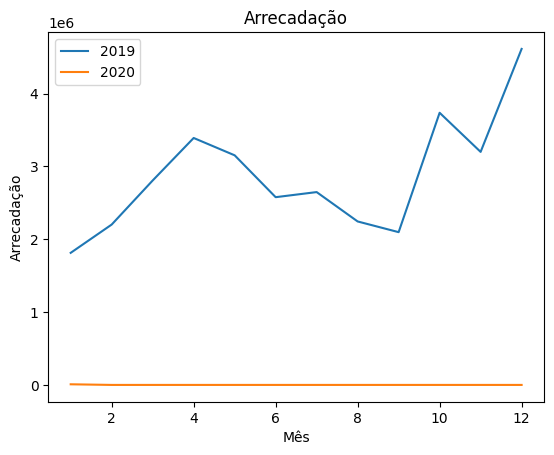

In [22]:
for year in years:
    target = []

    for value in budget:
        if value['year'] == year:
            target.append(value)

    months = [x['month'] for x in target]
    arrec  = [x['sum']   for x in target]  
    plt.plot(months, arrec, label=int(year))  
    print(target)


plt.title('Arrecadação')
plt.xlabel('Mês')
plt.ylabel('Arrecadação')
plt.legend()
plt.show()

# CIDADE COM MAIORES VENDAS

In [23]:
df.head()

,Order ID,Quantity Ordered,Price Each,Order Date,Purchase Address
0,194095,1.0,11.99,2019-05-16 17:14:00,"669 2nd St, New York City, NY 10001"
1,194096,1.0,3.84,2019-05-19 14:43:00,"844 Walnut St, Dallas, TX 75001"
2,194097,1.0,149.99,2019-05-24 11:36:00,"164 Madison St, New York City, NY 10001"
3,194098,1.0,11.99,2019-05-02 20:40:00,"622 Meadow St, Dallas, TX 75001"
4,194099,2.0,2.99,2019-05-11 22:55:00,"17 Church St, Seattle, WA 98101"


In [24]:
def getCity(value):
    lista = value.split(',')
    return 'None' if len(lista) == 1 else lista[1].strip()

df['City'] = df['Purchase Address'].apply(getCity)
df.head()

,Order ID,Quantity Ordered,Price Each,Order Date,Purchase Address,City
0,194095,1.0,11.99,2019-05-16 17:14:00,"669 2nd St, New York City, NY 10001",New York City
1,194096,1.0,3.84,2019-05-19 14:43:00,"844 Walnut St, Dallas, TX 75001",Dallas
2,194097,1.0,149.99,2019-05-24 11:36:00,"164 Madison St, New York City, NY 10001",New York City
3,194098,1.0,11.99,2019-05-02 20:40:00,"622 Meadow St, Dallas, TX 75001",Dallas
4,194099,2.0,2.99,2019-05-11 22:55:00,"17 Church St, Seattle, WA 98101",Seattle


In [25]:
cities = list(df['City'].unique())
cities.remove('None')
cities

['New York City',
 'Dallas',
 'Seattle',
 'San Francisco',
 'Boston',
 'Atlanta',
 'Austin',
 'Los Angeles',
 'Portland']

In [26]:
budget = []

for city in cities:
    target = df.loc[df['City'] == city]
    total  = (target['Quantity Ordered'] * target['Price Each']).sum()
    budget.append({'city': city, 'sum': total})

print(budget)
budget = pd.DataFrame(budget)
budget

[{'city': 'New York City', 'sum': 4664317.43}, {'city': 'Dallas', 'sum': 2767975.4}, {'city': 'Seattle', 'sum': 2747755.48}, {'city': 'San Francisco', 'sum': 8262203.909999998}, {'city': 'Boston', 'sum': 3661642.01}, {'city': 'Atlanta', 'sum': 2795498.58}, {'city': 'Austin', 'sum': 1819581.75}, {'city': 'Los Angeles', 'sum': 5452570.799999999}, {'city': 'Portland', 'sum': 2320490.6099999994}]


,city,sum
0,New York City,4664317.43
1,Dallas,2767975.40
2,Seattle,2747755.48
3,San Francisco,8262203.91
4,Boston,3661642.01
5,Atlanta,2795498.58
6,Austin,1819581.75
7,Los Angeles,5452570.80
8,Portland,2320490.61


In [27]:
budget.loc[budget['sum'] == budget['sum'].max()]

,city,sum
3,San Francisco,8262203.91


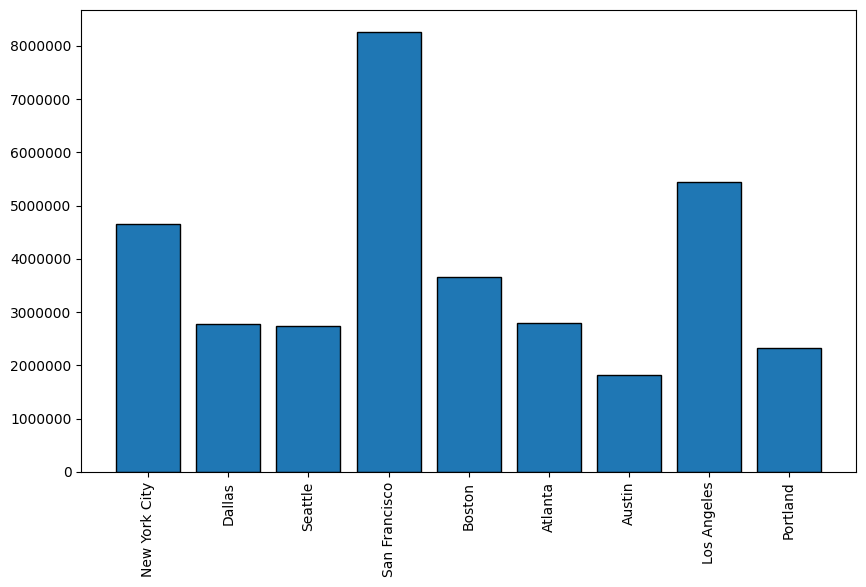

In [28]:
x = budget['city']
y = budget['sum']

plt.figure(figsize=(10, 6))
plt.gca().ticklabel_format(style='plain', axis='y') # pra nao ficar tipo 2e10 ou 1e6
plt.bar(x, y, edgecolor='black')
plt.xticks(cities, rotation='vertical')
plt.show()

# QUAL É O HORÁRIO COM MAIS VENDAS (GROUPBY)

In [29]:
df['Hour'] = df['Order Date'].dt.hour
del df['Order Date'] # O PANDAS NAÕ TRABALHA BEM COM DATETIME COM O GROUPBY

In [30]:
hourTable = df.groupby('Hour').count()
hourTable.head()

,Order ID,Quantity Ordered,Price Each,Purchase Address,City
Hour,,,,,
0.0,3910,3910,3910,3910,3910
1.0,2350,2350,2350,2350,2350
2.0,1243,1243,1243,1243,1243
3.0,831,831,831,831,831
4.0,854,854,854,854,854


In [31]:
plt.plot(hourTable.index, hourTable['Product'])

KeyError: 'Product'

In [ ]:
hourTable.loc[hourTable['Product'] == hourTable['Product'].max()]

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,City
Hour,,,,,,
19.0,12905,12905,12905,12905,12905,12905


# QUAIS PRODUTOS SÃO MAIS VENDIDOS

In [ ]:
dfDup = df.loc[df['Order ID'].duplicated(keep=False)]
dfDup

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,City,Hour
3,176560,Google Phone,1.0,600.00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,14.0
4,176560,Wired Headphones,1.0,11.99,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,14.0
18,176574,Google Phone,1.0,600.00,"20 Hill St, Los Angeles, CA 90001",Los Angeles,19.0
19,176574,USB-C Charging Cable,1.0,11.95,"20 Hill St, Los Angeles, CA 90001",Los Angeles,19.0
30,176585,Bose SoundSport Headphones,1.0,99.99,"823 Highland St, Boston, MA 02215",Boston,11.0
...,...,...,...,...,...,...,...
11628,259303,AA Batteries (4-pack),1.0,3.84,"106 7th St, Atlanta, GA 30301",Atlanta,20.0
11639,259314,Wired Headphones,1.0,11.99,"241 Highland St, Atlanta, GA 30301",Atlanta,0.0
11640,259314,AAA Batteries (4-pack),2.0,2.99,"241 Highland St, Atlanta, GA 30301",Atlanta,0.0
11677,259350,Google Phone,1.0,600.00,"519 Maple St, San Francisco, CA 94016",San Francisco,13.0


- Este comando abaixo vai criar uma nova coluna "Grouped", que irá pegar todos os "Products" agrupados pelo mesmo "Order ID" e juntál-los em uma mesma célula separados por vírgula

In [ ]:
dfDup['Grouped'] = dfDup.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
dfDup.head()

C:\Users\march\AppData\Local\Temp\ipykernel_18364\108738473.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfDup['Grouped'] = dfDup.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,City,Hour,Grouped
3,176560,Google Phone,1.0,600.00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,14.0,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1.0,11.99,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,14.0,"Google Phone,Wired Headphones"
18,176574,Google Phone,1.0,600.00,"20 Hill St, Los Angeles, CA 90001",Los Angeles,19.0,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1.0,11.95,"20 Hill St, Los Angeles, CA 90001",Los Angeles,19.0,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1.0,99.99,"823 Highland St, Boston, MA 02215",Boston,11.0,"Bose SoundSport Headphones,Bose SoundSport Hea..."


- Eliminando duplicatas

- 'keep' parameter determines which duplicate values to keep:
- 'first' (default): Keep the first occurrence, drop the rest.
- 'last': Keep the last occurrence, drop the rest.
- False: Drop all duplicates.

In [ ]:
del dfDup['Product']

dfDup.drop_duplicates(subset=['Order ID'], keep='first', inplace=True)
dfDup.head()

C:\Users\march\AppData\Local\Temp\ipykernel_18364\710552124.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfDup.drop_duplicates(subset=['Order ID'], keep='first', inplace=True)


,Order ID,Quantity Ordered,Price Each,Purchase Address,City,Hour,Grouped
3,176560,1.0,600.00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,14.0,"Google Phone,Wired Headphones"
18,176574,1.0,600.00,"20 Hill St, Los Angeles, CA 90001",Los Angeles,19.0,"Google Phone,USB-C Charging Cable"
30,176585,1.0,99.99,"823 Highland St, Boston, MA 02215",Boston,11.0,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,2.0,2.99,"365 Center St, San Francisco, CA 94016",San Francisco,17.0,"AAA Batteries (4-pack),Google Phone"
119,176672,1.0,14.95,"778 Maple St, New York City, NY 10001",New York City,11.0,"Lightning Charging Cable,USB-C Charging Cable"


In [ ]:
from itertools import combinations
from collections import Counter

In [ ]:
count = Counter()

for row in dfDup['Grouped']:
    products = row.split(',')
    count.update(Counter(combinations(products, 2))) # 2 porque queremos avaliar por pares mais vendidos

- O output abaixo mostra que os produtos que mais foram vendidos em conjunto para 1 pessoa, foram Iphone com Lightning Chargin Cable

In [ ]:
for key, value in count.most_common(10):
    print(f'{key} - {value}')

('Product', 'Product') - 62835
('iPhone', 'Lightning Charging Cable') - 1005
('Google Phone', 'USB-C Charging Cable') - 987
('iPhone', 'Wired Headphones') - 447
('Google Phone', 'Wired Headphones') - 414
('Vareebadd Phone', 'USB-C Charging Cable') - 361
('iPhone', 'Apple Airpods Headphones') - 360
('Google Phone', 'Bose SoundSport Headphones') - 220
('USB-C Charging Cable', 'Wired Headphones') - 160
('Vareebadd Phone', 'Wired Headphones') - 143


# QUAL PRODUTO VENDEU MAIS?

In [ ]:
products = pd.DataFrame()

for product in df['Product'].unique():
    target = df.loc[df['Product'] == product]
    total  = target['Quantity Ordered'].sum()
    
    products = pd.concat([products, pd.DataFrame([{'product': product, 'count': total}])])

products.head()


,product,count
0,USB-C Charging Cable,23975.0
0,Bose SoundSport Headphones,13457.0
0,Google Phone,5532.0
0,Wired Headphones,20557.0
0,Macbook Pro Laptop,4728.0


In [ ]:
products.loc[products['count'] == products['count'].max()]

,product,count
0,AAA Batteries (4-pack),31017.0


# QUAL PRODUTO GEROU MAIOR ARRECADAÇÃO

In [ ]:
df_arrec = pd.DataFrame()

for product in df['Product'].unique():
    target = df.loc[df['Product'] == product]
    total  = (target['Quantity Ordered'] * target['Price Each']).sum()
    df_arrec = pd.concat([df_arrec, pd.DataFrame([{'product': product, 'sum': total}])])

df_arrec

,product,sum
0,USB-C Charging Cable,286501.25
0,Bose SoundSport Headphones,1345565.43
0,Google Phone,3319200.00
0,Wired Headphones,246478.43
0,Macbook Pro Laptop,8037600.00
0,Lightning Charging Cable,347094.15
0,27in 4K Gaming Monitor,2435097.56
0,AA Batteries (4-pack),106118.40
0,Apple Airpods Headphones,2349150.00
0,AAA Batteries (4-pack),92740.83


In [ ]:
df_arrec.loc[df_arrec['sum'] == df_arrec['sum'].max()]

,product,sum
0,Macbook Pro Laptop,8037600.0
